In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install pyarrow

# extracting the data

In [3]:
all_data=pd.read_feather("Sales_data.ftr")

In [4]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# cleaning the data

In [5]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data.dropna(how="all",inplace=True)

In [7]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
all_data=all_data.drop_duplicates()

In [9]:
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


duplcate and na values are removed from the dataset

In [10]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
all_data['Product'].value_counts().head(5)

USB-C Charging Cable        21859
Lightning Charging Cable    21610
AAA Batteries (4-pack)      20612
AA Batteries (4-pack)       20558
Wired Headphones            18849
Name: Product, dtype: int64

What is the best month for sale?

In [12]:
all_data['Order Date'][0]

'04/19/19 08:46'

In [13]:
all_data['Order Date'][0].split(' ')[0]

'04/19/19'

In [14]:
all_data['Order Date'][0].split(' ')[0].split('/')[0]

'04'

In [15]:
def return_month(x):
    return x.split('/')[0]
    

In [16]:
all_data['Month']=all_data['Order Date'].apply(return_month)

In [17]:
all_data['Month'][0]

'04'

In [18]:
all_data['Month'].value_counts()

12            24944
10            20249
04            18257
11            17544
05            16552
03            15128
07            14275
06            13535
02            11957
08            11943
09            11603
01             9699
Order Date        1
Name: Month, dtype: int64

In [19]:
filter1=all_data['Month']=='Order Date'

In [20]:
all_data=all_data[~filter1]

In [21]:
all_data['Month'].value_counts()

12    24944
10    20249
04    18257
11    17544
05    16552
03    15128
07    14275
06    13535
02    11957
08    11943
09    11603
01     9699
Name: Month, dtype: int64

In [22]:
all_data['Month']=all_data['Month'].astype('int')

In [23]:
all_data['Month'].info()

<class 'pandas.core.series.Series'>
Int64Index: 185686 entries, 0 to 186849
Series name: Month
Non-Null Count   Dtype
--------------   -----
185686 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

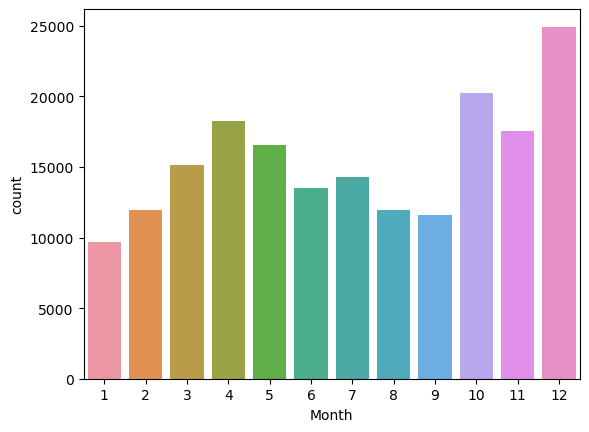

In [24]:
import seaborn as sns
sns.countplot(all_data['Month'])

december month has the highest sales

In [25]:
filter2=all_data['Month']==12

In [26]:
december_sales=all_data[filter2]

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product', ylabel='count'>

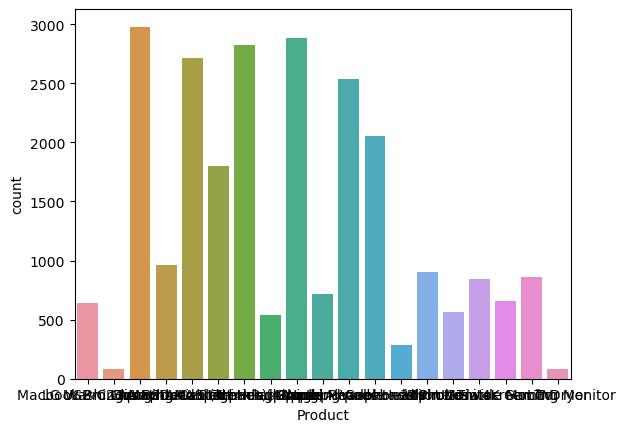

In [27]:

sns.countplot(december_sales['Product'])

In [28]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)

In [29]:
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

In [30]:
all_data['Sales'].head(5)

0     23.90
2     99.99
3    600.00
4     11.99
5     11.99
Name: Sales, dtype: float64

In [31]:
all_data['Sales'].unique()

array([2.39000e+01, 9.99900e+01, 6.00000e+02, 1.19900e+01, 1.19500e+01,
       1.70000e+03, 1.49500e+01, 3.89990e+02, 3.84000e+00, 1.50000e+02,
       2.99000e+00, 7.00000e+02, 5.98000e+00, 3.00000e+02, 1.49990e+02,
       1.09990e+02, 2.99000e+01, 3.59700e+01, 9.99990e+02, 4.00000e+02,
       2.39800e+01, 8.97000e+00, 3.79990e+02, 7.68000e+00, 2.19980e+02,
       1.99980e+02, 1.15200e+01, 4.48500e+01, 1.49500e+01, 1.19600e+01,
       2.09300e+01, 1.53600e+01, 1.79400e+01, 1.92000e+01, 3.58500e+01,
       3.40000e+03, 4.78000e+01, 7.59980e+02, 2.99980e+02, 7.79980e+02,
       7.17000e+01, 1.40000e+03, 1.20000e+03, 2.30400e+01, 2.39200e+01,
       8.00000e+02, 4.79600e+01, 2.68800e+01, 4.50000e+02, 5.98000e+01,
       1.99998e+03, 2.69100e+01, 5.97500e+01, 2.99970e+02])

In [32]:
sales_month=pd.DataFrame(all_data.groupby(['Month'])['Sales'].sum())

In [33]:
sales_month

,Sales
Month,
1,1821413.16
2,2200078.08
3,2804973.35
4,3389217.98
5,3150616.23
6,2576280.15
7,2646461.32
8,2241083.37
9,2094465.69


<AxesSubplot:xlabel='Month'>

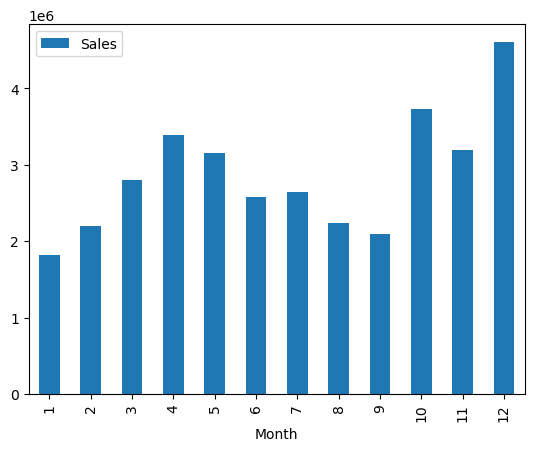

In [34]:
sales_month.plot(kind="bar")

december month has the highest sales and orders placed

# Analyzing sales and orders w.r.t cites

In [35]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [36]:
all_data['Purchase Address'].head(10)

0               917 1st St, Dallas, TX 75001
2          682 Chestnut St, Boston, MA 02215
3       669 Spruce St, Los Angeles, CA 90001
4       669 Spruce St, Los Angeles, CA 90001
5          333 8th St, Los Angeles, CA 90001
6     381 Wilson St, San Francisco, CA 94016
7           668 Center St, Seattle, WA 98101
8            790 Ridge St, Atlanta, GA 30301
9     915 Willow St, San Francisco, CA 94016
10               83 7th St, Boston, MA 02215
Name: Purchase Address, dtype: object

In [37]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [38]:
def ret_city(x):
    return x.split(',')[1]

In [39]:
all_data['Cities']=all_data['Purchase Address'].apply(ret_city)

In [40]:
all_data['Cities']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Cities, Length: 185686, dtype: object

<AxesSubplot:xlabel='Cities'>

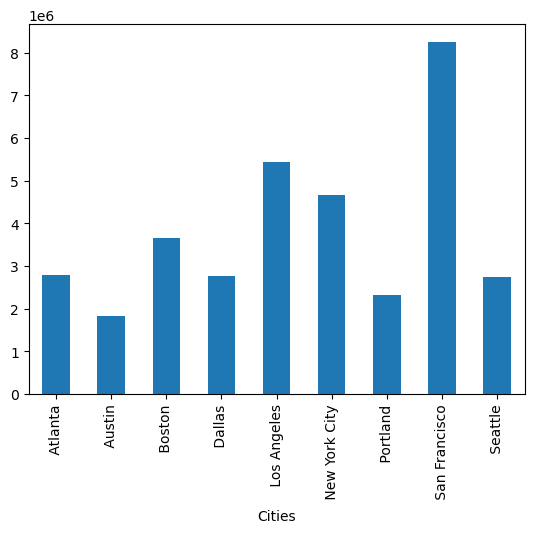

In [41]:
all_data.groupby(['Cities'])['Sales'].sum().plot(kind="bar")

San Fransisco has the highest sales

# Analyzing product sales and the reason

In [42]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [43]:
product_sales=pd.DataFrame(all_data.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'}))

In [44]:
all_data['Product'].value_counts()

USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [45]:
product_sales.reset_index()

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [46]:
product_sales.columns

Index(['Quantity Ordered', 'Price Each'], dtype='object')

In [47]:
product_sales.reset_index('Product')

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


we obtainded a data frame of products,results and their prices

<AxesSubplot:xlabel='Product'>

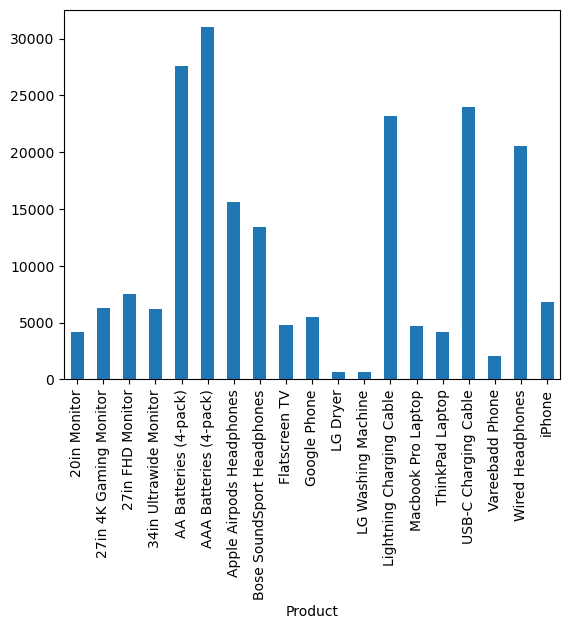

In [48]:
all_data.groupby(['Product'])['Quantity Ordered'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Product'>

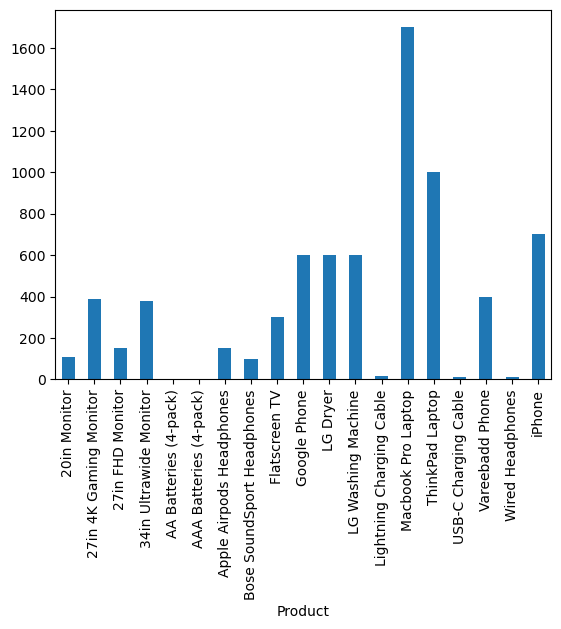

In [49]:
all_data.groupby(['Product'])['Price Each'].mean().plot(kind='bar')

AAA battries have been purchased the most because of their price

# Understanding the trends of sales of top 5 products sold

In [51]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [58]:
all_data['Product'].value_counts()[0:5].index

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [59]:
most_sold_product=all_data['Product'].value_counts()[0:5].index

In [60]:
most_sold_product

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [63]:
most_sold_product_df=all_data[all_data['Product'].isin(most_sold_product)]

In [65]:
most_sold_product_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


<AxesSubplot:xlabel='Product'>

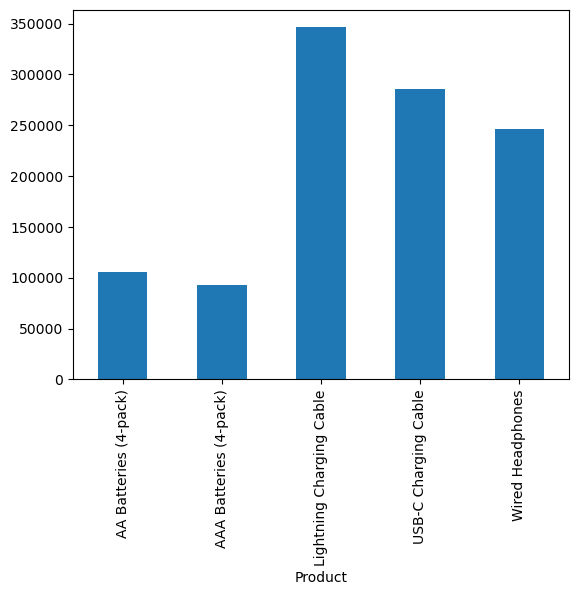

In [67]:
most_sold_product_df.groupby(['Product'])['Sales'].sum().plot(kind="bar")

In [70]:
most_sold_product_df.groupby(['Month','Product']).size().unstack()

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<AxesSubplot:xlabel='Month'>

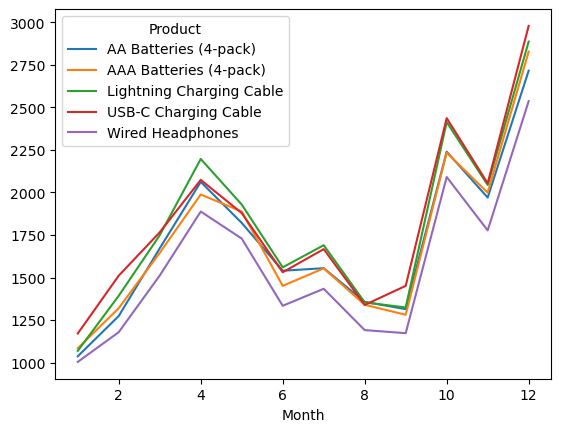

In [72]:
most_sold_product_df.groupby(['Month','Product']).size().unstack().plot(kind="line")

<AxesSubplot:xlabel='Month'>

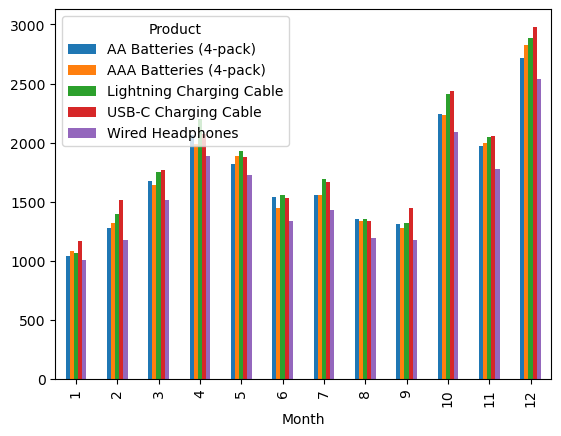

In [74]:
most_sold_product_df.groupby(['Month','Product']).size().unstack().plot(kind="bar")

# Which two products are bought together?

In [75]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [76]:
all_data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston


In [79]:
all_data['Order ID']=all_data['Order ID'].astype(int)

In [83]:
all_data.groupby(['Order ID','Product']).size().unstack()

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Order ID,,,,,,,,,,,,,,,,,,,
141234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
141235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
141236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
141237,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
319667,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [99]:
all_data.groupby(['Order ID'])['Product'].apply(lambda x:','.join(x))

Order ID
141234                        iPhone
141235      Lightning Charging Cable
141236              Wired Headphones
141237              27in FHD Monitor
141238              Wired Headphones
                     ...            
319666      Lightning Charging Cable
319667         AA Batteries (4-pack)
319668               Vareebadd Phone
319669              Wired Headphones
319670    Bose SoundSport Headphones
Name: Product, Length: 178437, dtype: object

In [84]:
df_duplicated=all_data[all_data['Order ID'].duplicated(keep=False)]

In [85]:
df_duplicated

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco
...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta
186804,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta
186841,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco


In [91]:
dup_products=df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x:','.join(x)).reset_index().rename(columns={"Products":"Grouped Products"})

In [92]:
dup_products

,Order ID,Product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [93]:
df_final=df_duplicated.merge(dup_products,on='Order ID',how='left')

In [94]:
df_final

,Order ID,Product_x,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Product_y
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone,USB-C Charging Cable"


In [95]:
no_dup=df_final.drop_duplicates(subset='Order ID')

In [96]:
no_dup

,Order ID,Product_x,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Product_y
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"
6,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,"Lightning Charging Cable,USB-C Charging Cable"
8,176681,Apple Airpods Headphones,1,150.00,04/20/19 10:39,"331 Cherry St, Seattle, WA 98101",4,150.00,Seattle,"Apple Airpods Headphones,ThinkPad Laptop"
...,...,...,...,...,...,...,...,...,...,...
14118,259277,iPhone,1,700.00,09/28/19 13:07,"795 Willow St, New York City, NY 10001",9,700.00,New York City,"iPhone,Wired Headphones"
14120,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,"iPhone,Lightning Charging Cable"
14122,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,"34in Ultrawide Monitor,AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones,AAA Batteries (4-pack)"


In [97]:
no_dup['Product_y'].value_counts()[0:5]

iPhone,Lightning Charging Cable         886
Google Phone,USB-C Charging Cable       857
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Product_y, dtype: int64

<AxesSubplot:>

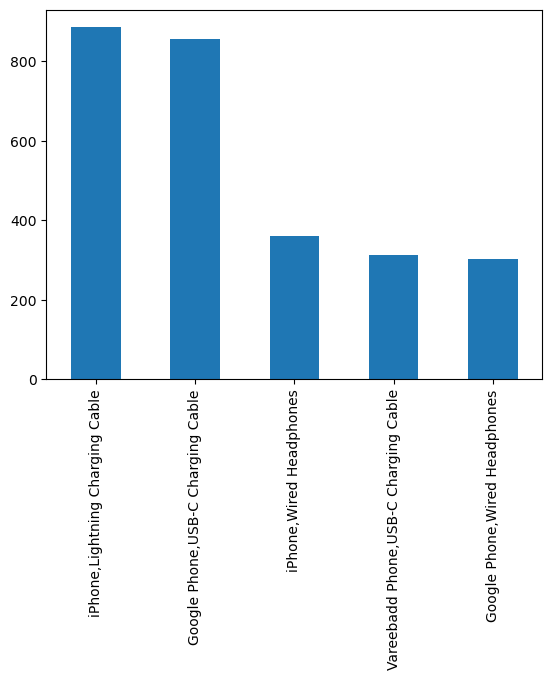

In [101]:
no_dup['Product_y'].value_counts()[0:5].plot(kind="bar")

Iphone and Charging cable are the products which have been frequently purchased together